## Hypothesentests für zwei Grundgesamtheitsmittelwerte
----------------------------------------

Bisher haben wir uns auf Hypothesentests für den Mittelwert einer Grundgesamtheit konzentriert. In vielen Anwendungen wollen wir jedoch die Mittelwerte von zwei oder mehr Grundgesamtheiten vergleichen. In den folgenden Abschnitten werden Schlussfolgerungsverfahren für den Vergleich der Mittelwerte von zwei Grundgesamtheiten erörtert. Daher müssen wir zunächst zwischen Stichproben aus zwei <a href="https://de.wikipedia.org/wiki/Stochastisch_unabh%C3%A4ngige_Ereignisse">unabhängigen</a> Populationen und Stichproben aus nicht unabhängigen Populationen unterscheiden, die als <a href="https://de.wikipedia.org/wiki/Zufallsstichprobe#Abh%C3%A4ngige_und_unabh%C3%A4ngige_Stichproben">abhängige</a> Stichproben bezeichnet werden.

In den folgenden Abschnitten werden die Parameter und die Statistiken von Population $1$ und Population $2$ mit dem Index $1$ bzw. $2$ bezeichnet. Somit sind $\mu_1$ und $\sigma_1$ die Populationsparameter der Population $1$ und $\mu_2$ und $\sigma_2$ die der Population $2$. Analog dazu sind $\bar{x}_1, s_1$ und $n_1$ der Stichprobenmittelwert, die Stichprobenstandardabweichung und der Stichprobenumfang der Grundgesamtheit $1$, während $\bar{x}_2, s_2$ und $n_2$ der aus der Grundgesamtheit $2$ gezogenen Stichprobe entsprechen.

Für unabhängige Stichproben mit dem Umfang $n_1$ und $n_2$ der Grundgesamtheit $1$ und der Grundgesamtheit $2$ ist der Mittelwert aller möglichen Unterschiede zwischen den beiden Stichprobenmittelwerten gleich dem Unterschied zwischen den beiden Grundgesamtheitsmittelwerten.

$$\mu_{\bar x_1 -\bar x_2} = \mu_1-\mu_2$$

Außerdem ist die Standardabweichung aller möglichen Unterschiede zwischen den beiden Stichprobenmittelwerten gleich der Quadratwurzel aus der Summe der Varianzen der Grundgesamtheit, jeweils dividiert durch den entsprechenden Stichprobenumfang.

$$\sigma_{\bar x_1 -\bar x_2} = \sqrt{\frac{\sigma^2_1}{n_1} + \frac{\sigma^2_1}{n_2}}$$

Eine normalverteilte Variable oder ein ausreichend großer Stichprobenumfang (man denke an den <a href="https://de.wikipedia.org/wiki/Zentraler_Grenzwertsatz">zentralen Grenzwertsatz</a>) führt dazu, dass die Differenz der Stichprobenmittelwerte ($\bar{x}_1-\bar{x}_2$) ebenfalls normalverteilt ist.

Die Hypothesentestverfahren für zwei Grundgesamtheitsmittelwerte sind im Grunde dieselben wie für einen Grundgesamtheitsmittelwert. Bitte beachten Sie, dass wir uns in den folgenden Abschnitten auf den $p$-Wert-Ansatz konzentrieren und nicht mehr auf den kritischen Wert-Ansatz eingehen. Daher wird das Hypothesentestverfahren leicht überarbeitet. Das schrittweise Vorgehen bei Hypothesentests ist wie folgt zusammengefasst

$$
\begin{array}{l}
\hline
\ \text{Schritt 1}  & \text{Geben Sie die Nullhypothese } H_0 \text{ und alternative Hypothese } H_A \text{ an.}\\
\ \text{Schritt 2}  & \text{Legen Sie das Signifikanzniveau, } \alpha\text{ fest.} \\
\ \text{Schritt 3}  & \text{Berechnen Sie den Wert der Teststatistik.} \\
\ \text{Schritt 4} &\text{P-Wert-Ansatz: Bestimmen Sie den p-Wert.} \\
\ \text{Schritt 5b} & \text{P-Wert-Ansatz: Wenn } p\le \alpha \text{, } H_0 \text{ ablehnen } \text{; ansonsten } H_0 \text{ nicht ablehnen} \text{.} \\
\ \text{Schritt 6} &\text{Interpretieren Sie das Ergebnis des Hypothesentests.} \\
\hline
\end{array}
$$

In [1]:
%matplotlib inline
# Load the "autoreload" extension
%load_ext autoreload
# always reload modules
%autoreload 2
# black formatter for jupyter notebooks
# %load_ext nb_black
# black formatter for jupyter lab
%load_ext lab_black

%run ../../src/notebook_env.py


---------------------------------
Working on the host: imarevic-pc

---------------------------------
Python version: 3.10.9 | packaged by conda-forge | (main, Feb  2 2023, 20:20:04) [GCC 11.3.0]

---------------------------------
Python interpreter: /home/imarevic/anaconda3/envs/srh/bin/python3.10


## Inferenz für zwei Grundgesamtheitsmittelwerte bei unabhängigen Stichproben; $s_1 \approx s_2$
----------------------------------------

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import sample
from scipy.stats import t, ttest_ind
import statsmodels.api as smi

In diesem Abschnitt führen wir einen Hypothesentest für die Mittelwerte von zwei Grundgesamtheiten durch. Wir gehen davon aus, dass die Standardabweichungen ($s_1,s_2$) der beiden Grundgesamtheiten gleich, aber unbekannt sind. Wenn wir jedoch $\sigma$ und die Differenz der Stichprobenmittelwerte ($\bar{x}_1-\bar{x}_2$) kennen würden, könnte die Teststatistik wie folgt geschrieben werden.

$$z = \frac{(\bar x_1 - \bar x_2)-(\mu_1-\mu_2)}{\sigma \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$$

In fast allen realen Anwendungen kennen wir $\sigma$ jedoch nicht. Daher müssen wir es im Voraus schätzen. Das geht am besten, wenn man die Stichprobenvarianzen $s^2_1$ und $s^2_2$ als zwei Schätzungen für $\sigma^2$ betrachtet. Durch Zusammenfassen der beiden Stichprobenabweichungen und Gewichtung nach dem Stichprobenumfang ergibt sich der Schätzwert für $\sigma^2$ wie folgt

$$s_g^2 = \frac{(n_1-1)s_1^2 + (n_2-1)s_2^2 }{n_1+n_2-2}\text{,}$$

und durch Ziehen der Quadratwurzel erhalten wir

$$s_g = \sqrt{\frac{(n_1-1)s_1^2 + (n_2-1)s_2^2 }{n_1+n_2-2}}\text{,}$$

Die Größe $s_g$ wird als <a href="https://de.wikipedia.org/wiki/Zweistichproben-t-Test#Zweistichproben-t-Test_f%C3%BCr_unabh%C3%A4ngige_Stichproben">gewichtete Stichprobenstandardabweichung</a> bezeichnet (engl. pooled), wobei der tiefgestellte Index $g$ für **gewichtet** steht.

Die Ersetzung von $\sigma$ in der obigen Gleichung durch seine Schätzung $s_g$ ergibt

$$t =  \frac{(\bar x_1 - \bar x_2)-(\mu_1-\mu_2)}{s_g \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$$

Der Nenner der Gleichung $s_g \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}$ ist der Schätzer der Standardabweichung von $\bar{x}_1-\bar{x}_2$, der wie folgt geschrieben werden kann

$$s_{\bar x_1 - \bar x_2} = s_g \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}$$

Bitte beachten Sie, dass die Gleichung für die Teststatistik $t$ einer $t$-Verteilung folgt. Die Freiheitsgrade ($df$) sind gegeben durch

$$df = n_1+n_2-2$$

### Intervall-Schätzung von $\mu_1-\mu_2$

Das $100(1-\alpha)\%$-Konfidenzintervall für $\mu_1-\mu_2$ ist gegeben durch

$$(\bar x_1 - \bar x_2) \pm t \times s_g \sqrt{\frac{1}{n_1}+\frac{1}{n_2}}\text{,}$$

wobei sich der Wert von $t$ aus der $t$-Verteilung für das gegebene Konfidenzniveau und $n_1+n_2-2$ Freiheitsgrade ergibt.

### Der Zweistichproben-$t$-Test für unabhängige Stichproben (engl. pooled $t$-Test): Ein Beispiel

Python ermöglicht es uns, einen **Zweistichproben-$t$-Test für unabhängige Stichproben** durchzuführen, indem wir die Funktion `ttest_ind()` um das Argument `equal_var = True` erweitern.

Um den Zweistichproben-$t$-Test zu üben, laden wir den `students` Datensatz. Sie können die Datei `students.csv` <a href="https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv">hier</a> herunterladen. Importieren Sie den Datensatz und weisen Sie ihm einen geeigneten Namen zu.

In [3]:
# Lese Datei students.csv als Dataframe ein; Indexspalte wird übersprungen
students = pd.read_csv("../../data/students.csv", index_col=0)

Der `students` Datensatz besteht aus $8239$ Zeilen, von denen jede einen bestimmten Studenten repräsentiert, und $16$ Spalten, von denen jede einer Variable/einem Merkmal entspricht, das sich auf diesen bestimmten Studenten bezieht. Diese selbsterklärenden Variablen sind: *stud_id, Name, Geschlecht, Alter, Größe, Gewicht, Religion, nc_score, Semester, Hauptfach, Nebenfach, score1, score2, online_tutorial, graduated, salary*.

Um den Zweistichproben-$t$-Test für unabhängige Stichproben zu veranschaulichen, untersuchen wir das mittlere Jahresgehalt (in Euro) der Absolventen. Die erste Grundgesamtheit besteht aus männlichen Studenten und die zweite aus weiblichen Studenten. **Die Frage ist, ob es einen Unterschied im mittleren Jahresgehalt der Absolventen in Bezug auf das Geschlecht gibt?**

### Vorbereitung der Daten

Wir beginnen mit der Datenaufbereitung.

 -   Wir unterteilen den Datensatz anhand der binären Variable `graduated`, die angibt, ob der Student seinen Abschluss bereits gemacht hat. Die ganze Zahl $1$ steht für "abgeschlossen", $0$
bedeutet, dass der Schüler seinen Abschluss noch nicht gemacht hat.
- Dann teilen wir den Datensatz nach Geschlecht auf (männlich und weiblich).
- Dann ziehen wir aus jeder Teilmenge $50$ weibliche und $50$ männliche Studenten und extrahieren die Variable von Interesse, das mittlere Jahresgehalt (in Euro), das in der Spalte Gehalt gespeichert ist. Diese beiden Vektoren ordnen wir den Variablen `male_sample` und `female_sample` zu.

In [4]:
n = 50

male = students.loc[(students["gender"] == "Male") & (students["graduated"] == 1)]
female = students.loc[(students["gender"] == "Female") & (students["graduated"] == 1)]

male_sample = male["salary"].sample(n=50, random_state=1)
female_sample = female["salary"].sample(n=50, random_state=1)

Außerdem prüfen wir ob die Daten normalverteilt sind, indem wir ein Normalwahrscheinlichkeitsdiagramm erstellen, das oft als <a href="https://de.wikipedia.org/wiki/Quantil-Quantil-Diagramm">Q-Q-Diagramm</a> bezeichnet wird. Wenn die Variable normalverteilt ist, sollte das Q-Q-Diagramm ungefähr linear sein.

In Python können wir die Funktion `qqplot()` verwenden, um Q-Q-Plots zu erstellen.

Text(0, 0.5, 'Stichproben Quantillen')

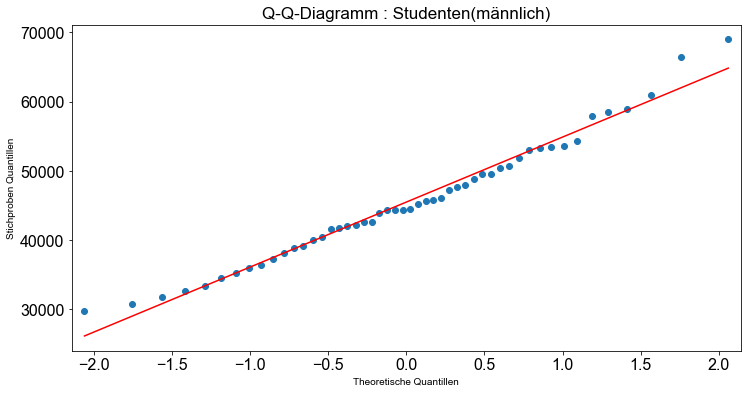

In [5]:
# Erzeuge Q-Q Plot
qqp = smi.qqplot(male_sample, line="r")
ax = qqp.gca()
ax.set_title("Q-Q-Diagramm : Studenten(männlich)")
ax.set_xlabel("Theoretische Quantillen")
ax.set_ylabel("Stichproben Quantillen")

Text(0, 0.5, 'Theoretische Quantillen')

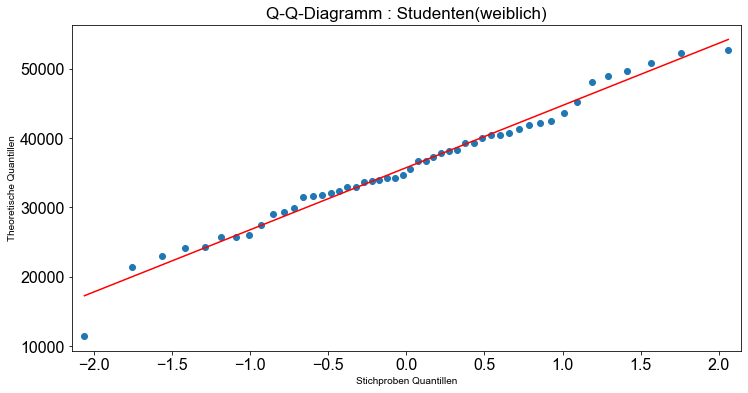

In [6]:
# Erzeuge Q-Q Plot
qqp = smi.qqplot(female_sample, line="r")
ax = qqp.gca()
ax.set_title("Q-Q-Diagramm : Studenten(weiblich)")
ax.set_xlabel("Stichproben Quantillen")
ax.set_ylabel("Theoretische Quantillen")

Wir sehen, dass die Stichprobendaten etwas Rauschen beinhalten sind, aber sie sind immer noch ungefähr normalverteilt. Die Abweichung von der Geraden im oberen und unteren Teil deutet darauf hin, dass die Wahrscheinlichkeitsverteilung leicht schief ist.

Außerdem prüfen wir, ob die Standardabweichungen der beiden Grundgesamtheiten ungefähr gleich sind. Als Faustregel gilt, dass die Bedingung gleicher Standardabweichungen der Grundgesamtheit erfüllt ist, wenn das Verhältnis der größeren zur kleineren Standardabweichung der Stichprobe kleiner als $2$ ist. Gehen wir davon aus, dass die Daten des `students` Datensatzes eine gute Annäherung an die Grundgesamtheit darstellen.

In [7]:
# Berechne Standardabweichung
np.std(male["salary"])

9653.18969182546

In [8]:
# Berechne Standardabweichung
np.std(female["salary"])

7723.490231798204

In [9]:
# Berechne Verhältnis
np.std(male["salary"]) / np.std(female["salary"])

1.2498481129790953

Das Verhältnis liegt bei etwa $1,249$, so dass wir zu dem Schluss kommen, dass das Kriterium der gleichen Standardabweichungen der Bevölkerung erfüllt ist. Eine einfache Visualisierungstechnik zur Bewertung der Streuung einer Variablen ist die Darstellung eines Boxplots.

Text(0.5, 0, 'Jährliches Einkommen in EUR')

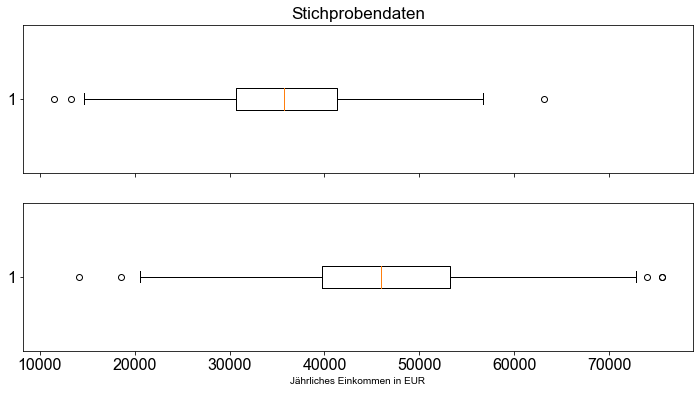

In [10]:
fig1, (ax1, ax2) = plt.subplots(2, sharex="all")

ax1.set_title("Stichprobendaten")
ax2.boxplot(male["salary"], vert=False)
ax1.boxplot(female["salary"], vert=False)
ax2.set_xlabel("Jährliches Einkommen in EUR")

### Überprüfung der Hypothesen

Wir führen den Zweistichproben-$t$-Test für unabhängige Stichproben durch, indem wir das schrittweise Durchführungsverfahren für Hypothesentests befolgen.

**Schritt 1 : Geben Sie die Nullhypothese $H_0$ und alternative Hypothese $H_A$ an**

Die Nullhypothese besagt, dass das durchschnittliche Jahresgehalt der männlichen Absolventen ($μ_1$) gleich dem durchschnittlichen Jahresgehalt der weiblichen Absolventen ($μ_2$) ist.

$$H_0: \quad \mu_1 = \mu_2$$

Es sei daran erinnert, dass die Formulierung der Alternativhypothese vorgibt, ob wir einen zweiseitigen, einen links- oder einen rechtsseitigen Hypothesentest durchführen. Wir wollen prüfen, ob das Gehalt der männlichen Absolventen ($μ_1$) höher ist als das durchschnittliche Jahresgehalt der weiblichen Absolventen ($μ_2$), daher wird die Alternativhypothese wie folgt formuliert

**Alternative Hypothese**

$$H_A: \quad \mu_1 > \mu_2$$

Aus dieser Formulierung ergibt sich ein rechtsseitiger Hypothesentest.

**Schritt 2: Legen Sie das Signifikanzniveau,$\alpha$ fest**

$$\alpha = 0,01$$

In [11]:
alpha = 0.01

**Schritt 3 und 4: Berechnen Sie den Wert der Teststatistik und den $p$-Wert**

Zur Veranschaulichung berechnen wir die Teststatistik manuell in Python. Erinnern Sie sich an die Gleichung für die Teststatistik von oben.

$$t =  \frac{(\bar x_1 - \bar x_2)-(\mu_1-\mu_2)}{s_g \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$$

Wenn $H_0$ wahr ist, dann ist $\mu_1-\mu_2=0$ und somit vereinfacht sich die Gleichung zu

$$t =  \frac{(\bar x_1 - \bar x_2)}{s_g \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}\text{,}$$

wobei $s_z$ gleich

$$s_g = \sqrt{\frac{(n_1-1)s_1^2 + (n_2-1)s_2^2 }{n_1+n_2-2}}$$

ist.

In [12]:
# Berechne Teststatistik
n1 = len(male_sample)
n2 = len(female_sample)
s1 = np.std(male_sample, ddof=1)
s2 = np.std(female_sample, ddof=1)
x1_bar = np.mean(male_sample)
x2_bar = np.mean(female_sample)

sg = np.sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))
tw = (x1_bar - x2_bar) / (sg * np.sqrt(1 / n1 + 1 / n2))
tw

5.591470501655584

Der numerische Wert der Teststatistik ist $5,59147$.

Um den $p$-Wert zu berechnen, wenden wir die Funktion `t.cdf()` an. Erinnern Sie sich daran, wie man die Freiheitsgrade berechnet.

$$df = n_1+n_2-2 = 50 + 50 - 2 = 98$$

In [13]:
# Berechne den p-Wert
df = n1 + n2 - 2
p = 1 - t.cdf(tw, df=df)
p

1.0169262409931434e-07

**Schritt 5: Wenn $p \le \alpha , H_0$ ablehnen; ansonsten $H_0$ nicht ablehnen**

In [14]:
p <= alpha

True

Der $p$-Wert ist kleiner als das angegebene Signifikanzniveau von $0,01$; wir verwerfen $H_0$. Die Testergebnisse sind statistisch signifikant auf dem $1 \%$-Niveau und liefern einen sehr starken Beweis gegen die Nullhypothese.

**Schritt 6: Interpretieren Sie das Ergebnis des Hypothesentests**

$p=1,0169 \cdot 10^{-7}$; Bei einem Signifikanzniveau von $1 \%$ lassen die Daten den Schluss zu, dass das Durchschnittsgehalt männlicher Studenten höher ist als das Durchschnittsgehalt weiblicher Studenten.

### Hypothesentests in Python

Wir haben soeben manuell einen Zweistichproben-$t$-Test für unabhängige Stichproben in Python durchgeführt. Bitte beachten Sie jedoch, dass wir die volle Leistungsfähigkeit von Python nutzen können, um das gleiche Ergebnis wie oben in nur einer Zeile Code zu erhalten!

Um einen Zweistichproben-$t$-Test für unabhängige Stichproben in Python durchzuführen, verwenden wir die Funktion `ttest_ind()`. Wir geben zwei Vektoren als Dateneingabe an und setzen `equal_var=True`, um explizit anzugeben, dass wir die gepoolte Version des $t$-Tests anwenden, und wir setzen das Argument `alternative` auf `alternative=greater`, um $H_A$ widerzuspiegeln: $\mu1 \gt \mu2$

In [15]:
ttest_ind(male_sample, female_sample, equal_var=True, alternative="greater")

Ttest_indResult(statistic=5.591470501655584, pvalue=1.0169262412759705e-07)

Ein großer Erfolg! Vergleichen Sie die Ausgabe der Funktion `ttest_ind()` mit unserem Ergebnis von oben. Sie stimmen perfekt überein! Auch hier können wir schlussfolgern, dass bei einem Signifikanzniveau von $1 \%$ die Daten einen sehr starken Hinweis darauf liefern, dass das Durchschnittsgehalt der männlichen Absolventen höher ist als das der weiblichen Absolventen.

In [16]:
%matplotlib inline
# Load the "autoreload" extension
%load_ext autoreload
# always reload modules
%autoreload 2
# black formatter for jupyter notebooks
# %load_ext nb_black
# black formatter for jupyter lab
%load_ext lab_black

%run ../../src/notebook_env.py

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black

---------------------------------
Working on the host: imarevic-pc

---------------------------------
Python version: 3.10.9 | packaged by conda-forge | (main, Feb  2 2023, 20:20:04) [GCC 11.3.0]

---------------------------------
Python interpreter: /home/imarevic/anaconda3/envs/srh/bin/python3.10


<Figure size 864x432 with 0 Axes>

## Inferenz für zwei Grundgesamtheitsmittelwerte bei unabhängigen Stichproben; $s_1 \ne s_2$
----------------------------------------

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import sample
from scipy.stats import t, ttest_ind
import statsmodels.api as smi

In den Fällen, in denen die Mittelwerte zweier Grundgesamtheiten getestet werden sollen und die Standardabweichungen zwischen den beiden Grundgesamtheiten unterschiedlich sind, wird der so genannte **nicht gepoolte $t$-Test** oder <a href="https://de.wikipedia.org/wiki/Zweistichproben-t-Test#Welch-Test">**Welch's $t$-Test**</a> angewendet.

Der **Welch's $t$-Test** ist dem **$2$-Stichproben $t$-Test für unabhängige Stichproben** sehr ähnlich, mit Ausnahme der Teststatistik $t$
und bei der Berechnung der Freiheitsgrade ($df$). Die Teststatistik nutzt nicht $s_g$, die gewichtete Standardabweichung, und wird geschrieben als

$$t =  \frac{(\bar x_1 - \bar x_2)}{ \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}\text{.}$$

Der Nenner der obigen Gleichung ist der Schätzer der Standardabweichung von $\bar x_1 - \bar x_2$ und gegeben durch

$$s_{\bar x_1 - \bar x_2} = \sqrt{\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2}}\text{.}$$

Die Teststatistik $t$ folgt einer $t$-Verteilung und die Freiheitsgrade ($df$) sind gegeben durch

$$df=\frac{\left(\frac{s_1^2}{n_1}+\frac{s_1^2}{n_2}\right)^2}{\frac{\left(\frac{s_1^2}{n_1}\right)^2}{n_1-1}+\frac{\left(\frac{s_2^2}{n_2}\right)^2}{n_2-1}}\text{.}$$

Runden Sie die Freiheitsgrade auf die nächste ganze Zahl ab, wenn Sie Wahrscheinlichkeitstabellen verwenden.

Der **nicht gepoolte $t$-Test** ist robust gegenüber mäßigen Verstößen gegen die Normalverteilungsannahme, aber er ist weniger robust gegenüber Ausreißern ({cite:t}`fahrmeirstatistik` s.403).

### Intervall-Schätzung von $\mu_1 - \mu_2$

Das $100(1-\alpha)\%$-Konfidenzintervall für $\mu_1-\mu_2$ ist

$$(\bar x_1 - \bar x_2) \pm t^* \times  \sqrt{\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2}}$$

wobei der Wert von $t$ aus der $t$-Verteilung für das gegebene Konfidenzniveau ermittelt wird. Die Freiheitsgrade ($df$) und die Standardabweichung ($s_{\bar x_1 - \bar x_2}$) ergeben sich aus der obigen Gleichung.

### Der Welch's $t$-Test: Ein Beispiel

Um praktische Erfahrungen zu sammeln, wenden wir den Welch's $t$-Test in einer Übung an. Dazu laden wir den `students` Datensatz. Sie können die Datei `students.csv` <a href="https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv">hier</a> herunterladen. Importieren Sie den Datensatz und geben Sie ihm einen passenden Namen.

In [18]:
# Lese Datei students.csv als Dataframe ein; Indexspalte wird übersprungen
students = pd.read_csv("../../data/students.csv", index_col=0)

Der `students` Datensatz besteht aus $8239$ Zeilen, von denen jede einen bestimmten Studenten repräsentiert, und $16$ Spalten, von denen jede einer Variable/einem Merkmal entspricht, das sich auf diesen bestimmten Studenten bezieht. Diese selbsterklärenden Variablen sind: *stud_id, Name, Geschlecht, Alter, Größe, Gewicht, Religion, nc_score, Semester, Hauptfach, Nebenfach, score1, score2, online_tutorial, graduated, salary*.

Zur Veranschaulichung des **nicht gepoolten $t$-Tests** untersuchen wir das mittlere Jahresgehalt (in Euro) von Absolventinnen in Abhängigkeit von ihrem Studienfach. Die erste Grundgesamtheit besteht aus Studentinnen mit dem Hauptfach Politikwissenschaft und die zweite Grundgesamtheit aus Studentinnen mit dem Hauptfach Sozialwissenschaften. Wir wollen testen, **ob es einen Unterschied im mittleren Gehalt dieser beiden Gruppen gibt.**

### Vorbereitung der Daten

Wir beginnen mit der Datenaufbereitung.

-  Wir unterteilen den Datensatz anhand der Variablen `gender` und `graduated`.
-   Dann unterteilen wir die Teilmenge in Absolventen der Politikwissenschaften und der Sozialwissenschaften (Variable `major`).
-   Dann ziehen wir aus jeder Gruppe $50$ Studenten und extrahieren die Variable von Interesse, das mittlere Jahresgehalt (in Euro), das in der Spalte `salary` gespeichert ist. Wir ordnen diese beiden Vektoren den Variablen `PS` und `SS` zu.

In [19]:
female_graduates = students.loc[
    (students["graduated"] == 1) & (students["gender"] == "Female")
]
subset_PS = female_graduates.loc[female_graduates["major"] == "Political Science"]
subset_SS = female_graduates.loc[female_graduates["major"] == "Social Sciences"]

PS = subset_PS["salary"].sample(n=50, random_state=2)
SS = subset_SS["salary"].sample(n=50, random_state=2)

Außerdem überprüfen wir, ob die Daten normalverteilt sind, indem wir ein Q-Q-Diagramm erstellen. In Python können wir die Funktion `qqplot()` verwenden, um Q-Q-Plots zu erstellen.

Text(0, 0.5, 'Stichproben Quantillen')

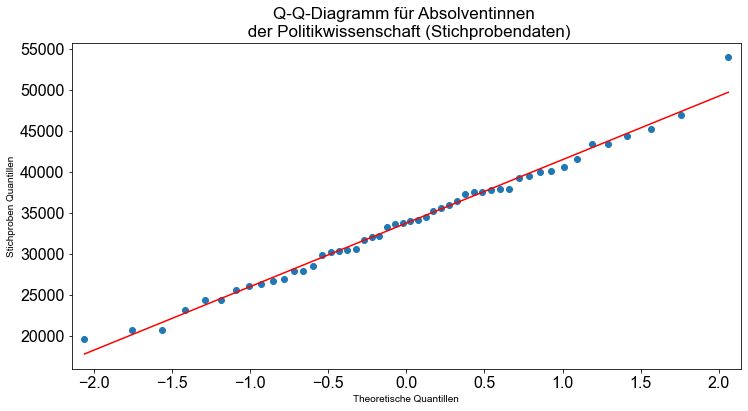

In [20]:
# Erzeuge Q-Q Plot
qqp = smi.qqplot(PS, line="r")
ax = qqp.gca()
ax.set_title(
    "Q-Q-Diagramm für Absolventinnen \n der Politikwissenschaft (Stichprobendaten)"
)
ax.set_xlabel("Theoretische Quantillen")
ax.set_ylabel("Stichproben Quantillen")

Text(0, 0.5, 'Stichproben Quantillen')

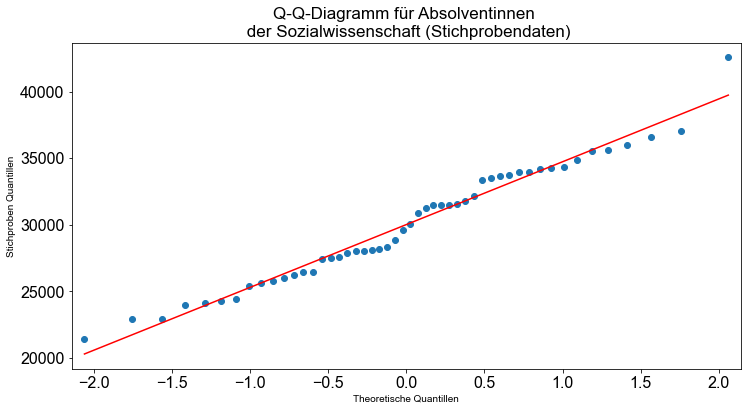

In [21]:
# Erzeuge Q-Q Plot
qqp2 = smi.qqplot(SS, line="r")
ax = qqp2.gca()
ax.set_title(
    "Q-Q-Diagramm für Absolventinnen \n der Sozialwissenschaft (Stichprobendaten)"
)
ax.set_xlabel("Theoretische Quantillen")
ax.set_ylabel("Stichproben Quantillen")

Wir sehen, dass die Daten beider Stichproben ungefähr auf einer Geraden liegen.

Gehen wir davon aus, dass die Daten des `students` Datensatzes eine gute Annäherung an die Grundgesamtheit darstellen. Dann können wir visuell überprüfen, ob sich die Standardabweichungen der beiden Grundgesamtheiten tatsächlich voneinander unterscheiden, indem wir ein Boxplot aufzeichnen.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f95fc633d60>,
 'caps': [<matplotlib.lines.Line2D at 0x7f95fc6682e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f95fc633ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f95fc668820>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f95fc668ac0>],
 'means': []}

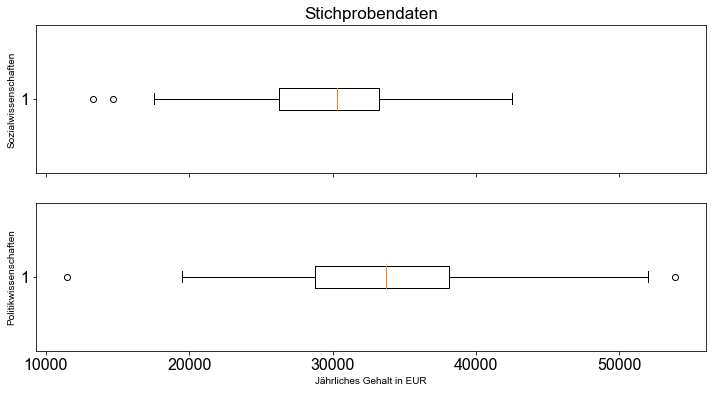

In [22]:
fig1, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)

ax1.set_title("Stichprobendaten")
ax1.set_ylabel("Sozialwissenschaften", size=10)
ax2.set_ylabel("Politikwissenschaften", size=10)
ax2.set_xlabel("Jährliches Gehalt in EUR")
ax2.boxplot(subset_PS["salary"], vert=False)
ax1.boxplot(subset_SS["salary"], vert=False)

Auf der Grundlage des grafischen Auswertungsansatzes kommen wir zu dem Schluss, dass die Daten annähernd normalverteilt sind und dass die Standardabweichungen voneinander abweichen.

### Überprüfung der Hypothesen

Erinnern Sie sich an die Forschungsfrage. **Lassen die Daten den Schluss zu, dass sich das mittlere Jahresgehalt von Absolventinnen mit einem Hauptfach in Politikwissenschaft vom mittleren Jahresgehalt von Absolventinnen mit einem Hauptfach in Sozialwissenschaften unterscheidet?**

Um den nicht zusammengefassten $t$-Test durchzuführen, folgen wir dem schrittweisen Durchführungsverfahren für Hypothesentests.

**Schritt 1 : Geben Sie die Nullhypothese $H_0$ und alternative Hypothese $H_A$ an**

Die Nullhypothese besagt, dass das durchschnittliche Jahresgehalt von Absolventinnen mit dem Hauptfach Politikwissenschaft ($\mu_1$) gleich dem durchschnittlichen Jahresgehalt von Absolventinnen mit dem Hauptfach Sozialwissenschaften ($\mu_2$) ist.

$$H_0: \quad \mu_1 = \mu_2$$

**Alternative Hypothese**

$$H_A: \quad \mu_1 \ne \mu_2$$

Diese Formulierung führt zu einem zweiseitigen Hypothesentest.

**Schritt 2: Legen Sie das Signifikanzniveau,$\alpha$ fest**

$$\alpha = 0,05$$

In [23]:
alpha = 0.05

**Schritt 3 und 4: Berechnen Sie den Wert der Teststatistik und den $p$-Wert**

Zur Veranschaulichung berechnen wir die Teststatistik manuell in Python. Wir erinnern uns an die Gleichungen für die Teststatistik von oben.

In [24]:
# Berechne die Teststatistik
n1 = len(PS)
n2 = len(SS)
s1 = np.std(PS, ddof=1)
s2 = np.std(SS, ddof=1)
x1_bar = np.mean(PS)
x2_bar = np.mean(SS)

tw = (x1_bar - x2_bar) / (np.sqrt(s1**2 / n1 + s2**2 / n2))
tw

3.054456171492353

Der numerische Wert der Teststatistik ist $3,05446$.

Um den $p$-Wert zu berechnen, wenden wir die Funktion `t.cdf()` an. Erinnern Sie sich daran, wie man die Freiheitsgrade berechnet.

$$df=\frac{\left(\frac{s_1^2}{n_1}+\frac{s_1^2}{n_2}\right)^2}{\frac{\left(\frac{s_1^2}{n_1}\right)^2}{n_1-1}+\frac{\left(\frac{s_2^2}{n_2}\right)^2}{n_2-1}}\text{,}$$

In [25]:
# Berechne df
df_numerator = (s1**2 / n1 + s2**2 / n2) ** 2
df_denominator = (s1**2 / n1) ** 2 / (n1 - 1) + (s2**2 / n2) ** 2 / (n2 - 1)
df = df_numerator / df_denominator
df

81.31178520706362

In [26]:
# Berechne p-Wert
# wir verwenden einen zweiseitigen Test
upper = 1 - t.cdf(abs(tw), df=df)
lower = t.cdf(-abs(tw), df=df)
p = upper + lower
p

0.0030479813074539763

**Schritt 5: Wenn $p \le \alpha , H_0$ ablehnen; ansonsten $H_0$ nicht ablehnen**

In [27]:
p <= alpha

True

Der $p$-Wert ist kleiner als das angegebene Signifikanzniveau von $0,05$; wir verwerfen $H_0$. Die Testergebnisse sind statistisch signifikant auf dem $5 \%$-Niveau und liefern einen sehr starken Beweis gegen die Nullhypothese.

**Schritt 6: Interpretieren Sie das Ergebnis des Hypothesentests**

$p=0,003047987$. Bei einem Signifikanzniveau von $5 \%$ lassen die Daten den Schluss zu, dass sich das durchschnittliche Jahresgehalt von Absolventinnen der Politikwissenschaft vom durchschnittlichen Jahresgehalt von Absolventinnen der Sozialwissenschaften unterscheidet.

### Hypothesentests in Python

Wir haben gerade einen Welch's $t$-Test in Python manuell durchgeführt. Jetzt nutzen wir die volle Leistung  von Python, um das gleiche Ergebnis wie oben mit nur einer Zeile Code zu erhalten!

Um einen Welch's $t$-Test in Python durchzuführen, verwenden wir die Funktion `ttest_ind()`. Wir geben zwei Vektoren als Dateneingabe an und setzen `equal_var = False`, um explizit anzugeben, dass wir die nicht gepoolte Version des $t$-Tests anwenden. Das Argument `alternative` muss nicht gesetzt werden, da der Standardwert unserer Alternativhypothese entspricht $H_A: \; \mu_1 \ne \mu_2$

In [28]:
ttest_ind(PS, SS, equal_var=False)

Ttest_indResult(statistic=3.0544561714923537, pvalue=0.0030479813074539563)

Stark! Vergleichen Sie die Ausgabe der Funktion `ttest_ind()` mit unserem Ergebnis von oben. Sie stimmen perfekt überein! Auch hier können wir schlussfolgern, dass die Daten bei einem Signifikanzniveau von $5 \%$ einen sehr starken Hinweis darauf liefern, dass sich das durchschnittliche Jahresgehalt von Absolventinnen der Politikwissenschaft vom durchschnittlichen Jahresgehalt von Absolventinnen der Sozialwissenschaften unterscheidet.

In [29]:
%matplotlib inline
# Load the "autoreload" extension
%load_ext autoreload
# always reload modules
%autoreload 2
# black formatter for jupyter notebooks
# %load_ext nb_black
# black formatter for jupyter lab
%load_ext lab_black

%run ../../src/notebook_env.py

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black

---------------------------------
Working on the host: imarevic-pc

---------------------------------
Python version: 3.10.9 | packaged by conda-forge | (main, Feb  2 2023, 20:20:04) [GCC 11.3.0]

---------------------------------
Python interpreter: /home/imarevic/anaconda3/envs/srh/bin/python3.10


<Figure size 864x432 with 0 Axes>

## Inferenz für zwei Grundgesamtheitsmittelwerte bei gepaarten Stichproben
----------------------------------------

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import sample
from scipy.stats import t, ttest_rel
import statsmodels.api as smi

Wenden wir uns nun einem Hypothesentestverfahren für die Differenz zwischen zwei Grundgesamtheitsmittelwerte zu, wenn die Stichproben **abhängig** sind. Wenn beispielsweise zwei Datenwerte aus derselben Quelle (oder demselben Teilsystem) stammen, werden diese als **gepaarte** oder **abhängige** Stichproben bezeichnet.

Sehr häufig werden diese Verfahren für die **Before-After-Control-Impact (BACI)** eingesetzt. Stellen Sie sich einen Fall vor, in dem Sie die Wirksamkeit eines Filtersystems zur Entfernung von Luftschadstoffen, die von einer Fabrik freigesetzt werden, bewerten sollen. In diesem Fall besteht eine Grundgesamtheit aus Messungen der Luftqualität vor der Einführung oder Erneuerung des Filtersystems und die andere Grundgesamtheit aus Messungen der Luftqualität nach der Installation des neuen Filtersystems. In diesem Fall hat man es mit gepaarten Stichproben zu tun, da die beiden Datensätze von derselben Quelle, der Fabrik, erhoben werden.

Bei gepaarten Stichproben wird die Differenz zwischen den Datenwerten der beiden Stichproben mit $d$ bezeichnet, oft auch als **gepaarte Differenz** bezeichnet. Beachten Sie, dass der Stichprobenumfang $n$ für jede Stichprobe gleich ist. Der Mittelwert der gepaarten Differenzen für die Stichproben wird als $\bar d$ bezeichnet.

$$\bar d = \frac{\sum d}{n}$$

Die Standardabweichung der gepaarten Unterschiede für zwei Stichproben, $s_d$, wird wie folgt berechnet

$$s_d = \sqrt{\frac{\sum d^2 - \frac{(\sum d)^2}{n}}{n-1}}$$

Angenommen, die gepaarte Differenzvariable $d$ ist normalverteilt, dann wird die <a href="https://de.wikipedia.org/wiki/Zweistichproben-t-Test#Zweistichproben-t-Test_f%C3%BCr_abh%C3%A4ngige_Stichproben">gepaarte $t$-Statistik</a> wie folgt ausgedrückt

$$t= \frac{\bar d - (\mu_1-\mu_2)}{\frac{s_d}{\sqrt{n}}}\text{,}$$

was sich vereinfacht zu

$$t= \frac{\bar d}{\frac{s_d}{\sqrt{n}}}\text{,}$$

wenn $\mu_1-\mu_2 = 0$. Die Teststatistik $t$ für gepaarte Stichproben folgt einer $t$-Verteilung mit $df=n-1$.

### Intervall-Schätzung von $\mu_d$

Das $100(1-\alpha)\%$-Konfidenzintervall für $\mu_d$ ist

$$\bar d \pm t \times \frac{s_d}{\sqrt{n}}$$

wobei sich der Wert von $t$ aus der $t$-Verteilung für das gegebene Konfidenzniveau und $n-1$ Freiheitsgrade ergibt.

### Der $2$-Stichproben $t$-Test für gepaarte (abhängige) Stichproben: Ein Beispiel

Um praktische Erfahrungen zu sammeln, wenden wir den **gepaarten $t$-Test** in einer Übung an. Dazu laden wir den `students` Datensatz. Sie können die Datei `students.csv` <a href="https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv">hier</a> herunterladen. Importieren Sie den Datensatz und geben Sie ihm einen passenden Namen.

In [31]:
# Lese Datei students.csv als Dataframe ein; Indexspalte wird übersprungen
students = pd.read_csv("../../data/students.csv", index_col=0)

Der `students` Datensatz besteht aus $8239$ Zeilen, von denen jede einen bestimmten Studenten repräsentiert, und $16$ Spalten, von denen jede einer Variable/einem Merkmal entspricht, das sich auf diesen bestimmten Studenten bezieht. Diese selbsterklärenden Variablen sind: *stud_id, name, gender, age, height, weight, religion, nc_score, semester, major, minor, score1, score2, online_tutorial, graduated, salary.*

Um den gepaarten $t$-Test für abhängige Stichproben zu veranschaulichen, **interessieren wir uns für die Frage, ob ein Online-Tutorium zum Erlernen von Statistik den Studenten hilft, ihre Noten zu verbessern**. Es gibt drei Variablen im Datensatz der Studenten, die von Interesse sind. Die Variable `online_tutorial` ist eine binäre Variable, die den Wert $1$ annimmt, wenn der Student das Online-Tutorium zum Thema Statistik absolviert hat, und ansonsten den Wert $0$. Die Variablen `score1` und `score2` geben die Noten ($0-100$) für zwei Klausuren in Mathematik und Statistik an. Je höher der Wert ist, desto besser hat der jeweilige Studierende abgeschnitten. Bitte beachten Sie, dass die erste Prüfung stattfindet, bevor die Studierenden das Online-Tutorium zum Thema Statistik besucht haben. Die Teilnahme am Online-Tutorium zur Statistik ist nicht verpflichtend, die beiden Prüfungen sind jedoch für alle Studierenden obligatorisch. Die erste Prüfung (`score1`) findet zu Beginn des $3$. Semesters statt, die zweite Prüfung (`score2`) am Ende des $3$. Semesters.

Im Wesentlichen sind zwei Forschungsfragen von Interesse. **Erstens wollen wir untersuchen, ob die Gruppe der Studierenden, die das Online-Tutorial zum Statistiklernen besucht hat, in der zweiten Prüfung besser abschneidet als in den ersten Prüfungen. Zweitens wird untersucht, wie die Gruppe der Studierenden, die nicht am Online-Tutorium für Statistik teilgenommen hat, bei beiden Prüfungen abgeschnitten hat.**

### Vorbereitung der Daten

Wir beginnen mit der ersten Forschungsfrage und konzentrieren uns auf die Studierenden, die das Online-Tutorial zum Thema Statistik besucht haben.

Für die Datenaufbereitung unterteilen wir den Datensatz anhand der Variable `online_tutorial`, die angibt, ob der Studierende das Tutorium besucht hat oder nicht ($1$=ja, $0$=nein). Dann ziehen wir eine Zufallsstichprobe von $65$ Studenten aus dem Datensatz und extrahieren die beiden Variablen von Interesse, `score1` und `score2`. Wir speichern jede von ihnen in einem Vektor mit den Namen `score1_sample` und `score2_sample`.

In [32]:
tutorial = students.loc[students["online_tutorial"] == 1]
n = 65
score1_sample = tutorial["score1"].sample(n, random_state=1)
score2_sample = tutorial["score2"].sample(n, random_state=1)

Nun berechnen wir die gepaarten Differenzen, $d$, und stellen sie dar.

Text(0, 0.5, "Unterschied der 'Scores'")

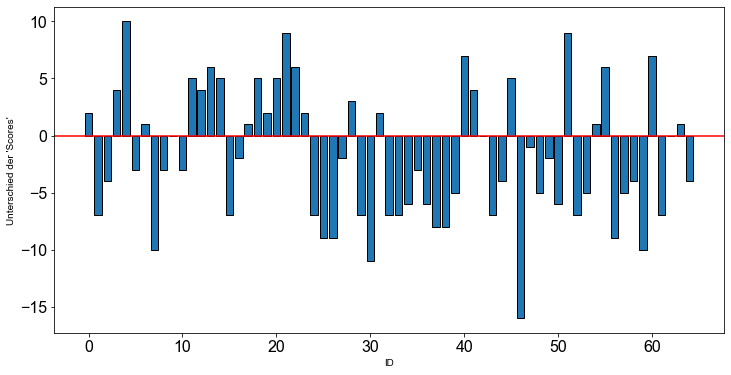

In [33]:
d = score1_sample - score2_sample
x = np.arange(n)
fig, ax = plt.subplots()
ax.axhline(y=0, color="r")
ax.bar(x, d, edgecolor="k")
ax.set_xlabel("ID")
ax.set_ylabel("Unterschied der 'Scores'")

Das Diagramm sieht wie erwartet aus. Einige Studierende schneiden in der ersten Prüfung besser ab als in der zweiten Prüfung und umgekehrt.

Um die Normalverteilungsannahme zu überprüfen, stützen wir uns wiederum auf eine visuelle Inspektion eines <a href="https://de.wikipedia.org/wiki/Quantil-Quantil-Diagramm">Q-Q-Plots</a>. Wenn die Variable normalverteilt ist, sollte das Q-Q-Diagramm ungefähr linear sein. In Python können wir die Funktion `qqplot()` verwenden, um Q-Q-Plots zu erstellen.

Text(0, 0.5, 'Stichproben Quantillen')

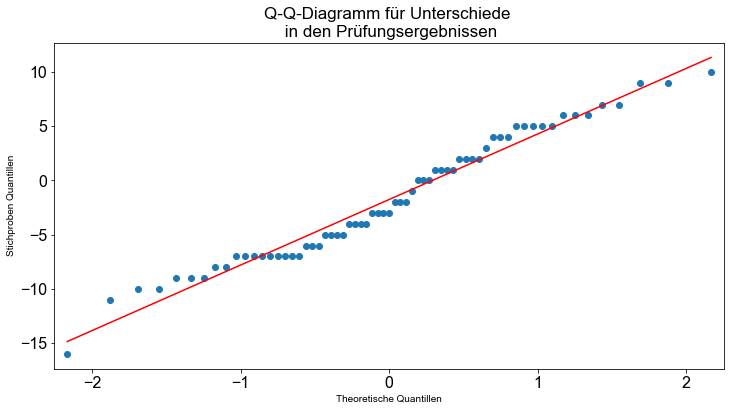

In [34]:
# Erzeuge Q-Q Plot
qqp = smi.qqplot(d, line="r")
ax = qqp.gca()
ax.set_title("Q-Q-Diagramm für Unterschiede \n in den Prüfungsergebnissen")
ax.set_xlabel("Theoretische Quantillen")
ax.set_ylabel("Stichproben Quantillen")

Die Daten sind nicht sehr genau und etwas verrauscht, aber sie scheinen ungefähr normalverteilt zu sein.

Wir berechnen weiter $\bar d$ den Mittelwert der gepaarten Differenzen

$$\bar d = \frac{\sum d}{n}\text{,}$$

und $s_d$, die Standardabweichung der gepaarten Unterschiede für zwei Stichproben

$$s_d = \sqrt{\frac{\sum d^2 - \frac{(\sum d)^2}{n}}{n-1}}\text{.}$$

In [35]:
# gepaarte Differenz
d_bar = sum(d) / len(d)
d_bar

-1.7538461538461538

In [36]:
# Standardabweichung
s_d = np.sqrt((sum(d**2) - (sum(d) ** 2 / len(d))) / (n - 1))
s_d

5.836391139947831

### Überprüfung der Hypothesen

Jetzt sind wir bereit, den **gepaarten $t$-Test** anzuwenden. Erinnern Sie sich an unsere erste Forschungsfrage: **Lassen die Daten den Schluss zu, dass sich die durchschnittlichen Prüfungsergebnisse verbessern, wenn die Studierenden ein Online-Tutorial zum Thema Statistik besuchen?**

Wir folgen dem schrittweisen Implementierungsverfahren für Hypothesentests.

**Schritt 1 : Geben Sie die Nullhypothese $H_0$ und alternative Hypothese $H_A$ an**

Die Nullhypothese besagt, dass es keinen Unterschied im Mittelwert der Prüfungsnoten der einen Prüfung im Vergleich zur anderen gibt.

$$H_0: \quad \mu_1 = \mu_2$$

Erinnern Sie sich daran, dass die Formulierung der Alternativhypothese vorgibt, ob wir einen zweiseitigen, einen links- oder einen rechtsseitigen Hypothesentest durchführen.

**Alternative Hypothese**

$$H_A: \quad \mu_1 < \mu_2$$

Diese Formulierung führt zu einem linksseitigen Hypothesentest und besagt, dass die Studenten im Durchschnitt bei der zweiten Prüfung besser abschneiden.

**Schritt 2: Legen Sie das Signifikanzniveau,$\alpha$ fest**

$$\alpha = 0,05$$

In [37]:
alpha = 0.05

**Schritt 3 und 4: Berechnen Sie den Wert der Teststatistik und den $p$-Wert**

Zur Veranschaulichung berechnen wir die Teststatistik manuell in Python. Erinnern Sie sich an die obige Gleichungsform:

$$t= \frac{\bar d - (\mu_1-\mu_2)}{\frac{s_d}{\sqrt{n}}}$$

Wenn $H_0$ wahr ist, dann ist $μ_1-μ_2=0$ und somit vereinfacht sich die Gleichung zu

$$t= \frac{\bar d}{\frac{s_d}{\sqrt{n}}}\text{.}$$

In [38]:
# Berechne Teststatistik

# gepaarte Differenz
d_bar = sum(d) / len(d)

# Standardabweichung
s_d = np.sqrt((sum(d**2) - (sum(d) ** 2 / len(d))) / (n - 1))

# Teststatistik
tw = d_bar / (s_d / np.sqrt(len(d)))
tw

-2.4227231184673745

Der numerische Wert der Teststatistik ist $-2,422723$.

Um den $p$-Wert zu berechnen, wenden wir die Funktion `t.cdf()` an. Erinnern Sie sich daran, wie man die Freiheitsgrade berechnet.

$$df = n - 1= 64$$

In [39]:
# Berechne p-Wert
df = len(d) - 1
p = t.cdf(tw, df=df)
p

0.009122595661033035

**Schritt 5: Wenn $p \le \alpha , H_0$ ablehnen; ansonsten $H_0$ nicht ablehnen**

In [40]:
p <= alpha

True

Der $p$-Wert ist kleiner als das angegebene Signifikanzniveau von $0,05$; wir verwerfen $H_0$. Die Testergebnisse sind statistisch signifikant auf dem $5 \%$-Niveau und liefern einen sehr starken Beweis gegen die Nullhypothese.

**Schritt 6: Interpretieren Sie das Ergebnis des Hypothesentests**

$p=0,009123$. Bei einem Signifikanzniveau von $5 \%$ lassen die Daten den Schluss zu, dass sich die Prüfungsnoten der Studierenden nach der Teilnahme an einem Online-Tutorium für Statistik verbessern.

### Hypothesentests in Python

Wir haben soeben manuell einen gepaarten $t$-Test in Python durchgeführt. Das ist gut, aber jetzt nutzen wir die ganze Macht von Python, um das gleiche Ergebnis wie oben mit nur einer Zeile Code zu erhalten!

Um einen gepaarten $t$-Test in Python durchzuführen, verwenden wir die Funktion `ttest_rel()`. Wir geben zwei Vektoren als Dateneingabe an und wir setzen das Argument `alternative` auf `alternative = 'less'`, um auf $HA:\mu_1 \lt \mu_2$ zu testen

In [41]:
ttest_rel(score1_sample, score2_sample, alternative="less")

Ttest_relResult(statistic=-2.4227231184673745, pvalue=0.009122595661033035)

Großartig! Vergleichen Sie die Ausgabe der Funktion `ttest_rel()` mit unserem Ergebnis von oben. Sie stimmen perfekt überein! Auch hier können wir schlussfolgern, dass die Daten bei einem Signifikanzniveau von $5 \%$ einen sehr starken Hinweis darauf liefern, dass sich die Prüfungsnoten der Studenten nach der Teilnahme an einem Online-Tutorium für Statistik verbessern.

Bevor wir fortfahren, muss noch eine Forschungsfrage beantwortet werden. Was ist, wenn es andere Gründe für die besseren Noten in der zweiten Prüfung gibt? Was ist, wenn die zweite Prüfung viel einfacher war? Was wäre, wenn die Studenten einen tollen Dozenten hatten und sich dadurch im Laufe des Semesters verbessert haben? Wir testen diese Hypothese, indem wir einen gepaarten $t$-Test durchführen, und zwar explizit für die Studierenden, die nicht am Online-Tutorium für Statistik teilgenommen haben. Da wir mit der Python-Maschinerie bestens vertraut sind, führen wir einen gepaarten $t$-Test mit nur wenigen Zeilen Code durch.

In [42]:
no_tutorial = students.loc[students["online_tutorial"] == 0]

n = 65


score1_no_tutorial = no_tutorial["score1"].sample(n, random_state=1)
score2_no_tutorial = no_tutorial["score2"].sample(n, random_state=1)

# führe paired t-test durch
statistics, pvalue = ttest_rel(
    score1_no_tutorial, score2_no_tutorial, nan_policy="omit", alternative="less"
)
ttest_rel(score1_no_tutorial, score2_no_tutorial, nan_policy="omit", alternative="less")

Ttest_relResult(statistic=2.1307181194375913, pvalue=0.9771439852770387)

In [43]:
pvalue <= alpha

False

Der $p$-Wert ist größer als das angegebene Signifikanzniveau von $0,05$; wir verwerfen $H_0$ nicht. Die Testergebnisse sind auf dem $5 \%$-Niveau statistisch signifikant und liefern keinen ausreichenden Beweis gegen die Nullhypothese.

Bei einem Signifikanzniveau von $5 \%$ liefern die Daten keine ausreichende Evidenz für die Schlussfolgerung, dass sich die Prüfungsnoten der Studierenden, die nicht am Online-Tutorium teilgenommen haben, verbessert haben.